In [ ]:
import numpy as np
from math import sin, cos, pi
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
P = 10
L = 40
step = 0.01

In [ ]:
def p_part(x):
  return P * sin(x) / x + cos(x)

In [ ]:
def iterate():
  start = -L / 2
  cur = start

  alpha_a = []
  f = []

  while cur <= -start:
    alpha_a.append(cur)
    f.append(p_part(cur))
    cur += step
  fmin = [-1 for i in alpha_a]
  fmax = [1 for i in alpha_a]

  return alpha_a, f, fmin, fmax

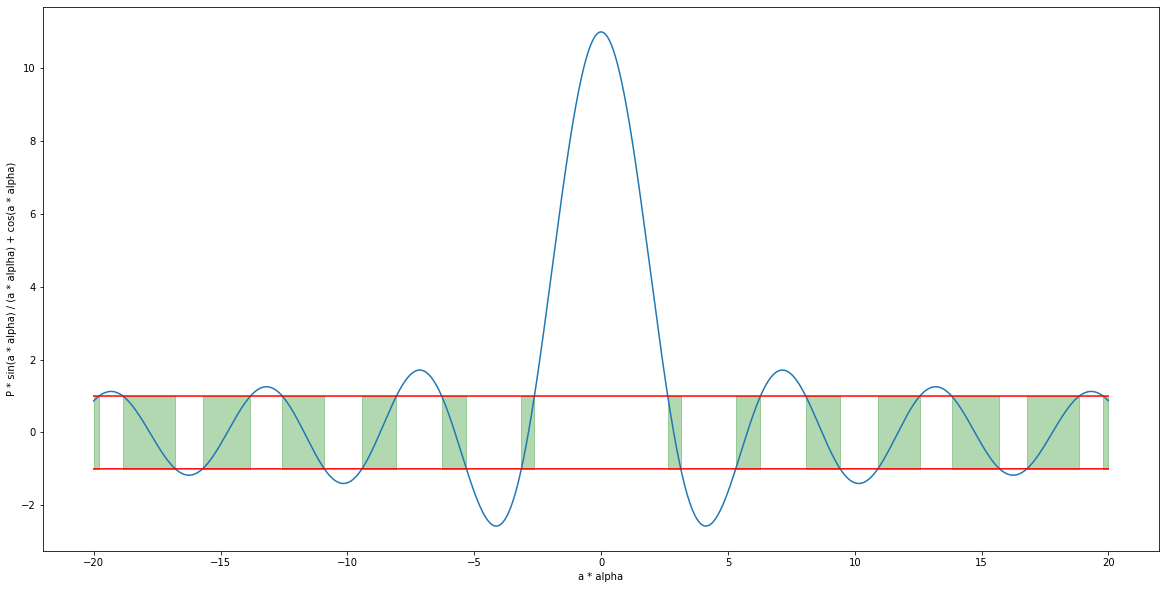

In [ ]:
x, f, minn, maxx = iterate()
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)
ax = fig.add_subplot(111)
ax.plot(x, f)
ax.plot(x, minn, color="red")
ax.plot(x, maxx, color="red")

cond = [f[i] < 1 and f[i] > -1 for i in range(len(f))]
ax.fill_between(x, minn, maxx, where=cond, color="green", alpha=0.3)

ax.set_xlabel("a * alpha")
ax.set_ylabel("P * sin(a * alpha) / (a * alplha) + cos(a * alpha)")
plt.show()

In [ ]:
M = 7

P = 50

h = 1.05e-34
m = 9.1e-31

a = 3e-10
n = [i for i in range(1, M + 1)]
A = [((h * pi * i) ** 2) / (m * (a ** 2) * P) for i in n]
dk = 2 * M * pi / a / 100000

In [ ]:
def energy(k, n):
  return ((h ** 2) * pi * (n ** 2)) / (2 * m * a ** 2) - ((h * pi * n) ** 2) / (m * (a ** 2) * P) + ((-1) ** n) * A[n - 1] * cos(k * a)

In [ ]:
def iterate_zones_mini():
  start = -pi / a
  cur = start

  E = []
  ind = 0
  k = []

  for i in n:
    E.append([])
    while cur <= -start:
      E[ind].append(energy(cur, i))

      if i == 1:
        k.append(cur)

      cur += dk

    ind += 1
    cur = start 
    
  return k, E

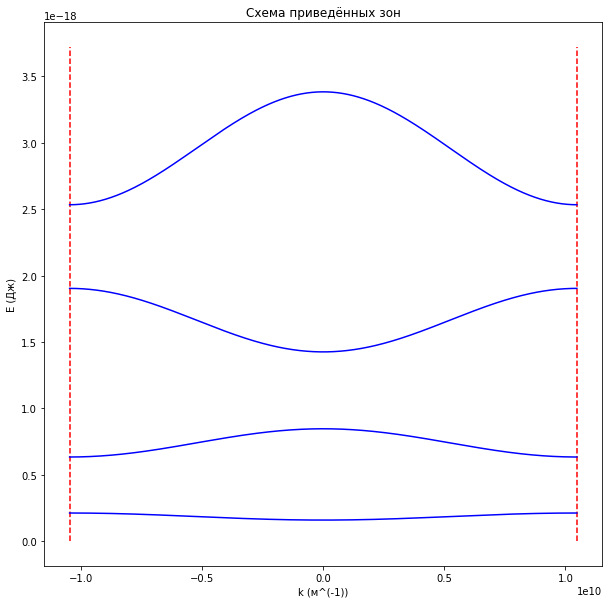

In [ ]:
k, E = iterate_zones_mini()
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = fig.add_subplot(111)
for i in range(len(n)):
  ax.plot(k, E[i], color="blue")

maxh = max(E[len(E) - 1]);

ax.vlines(-pi / a, 0, maxh * 1.1, color="red", ls="--")
ax.vlines(pi / a, 0, maxh * 1.1, color="red", ls="--")
ax.set_xlabel("k (м^(-1))")
ax.set_ylabel("E (Дж)")
ax.set_title("Схема приведённых зон")
plt.show()

In [ ]:
def iterate_zones_maxi():
  start = -max(n) * pi / a
  k = []
  E = []
  cur = start
  cur_n = max(n)
  ind = 0
  while cur_n > 0:
    k.append([])
    E.append([])
    while cur <= (-cur_n + 1) * pi / a:
      k[ind].append(cur)
      E[ind].append(energy(cur, cur_n))
      cur += dk
    cur_n -= 1
    ind += 1

  ind = max(n)
  cur_n = 1
  while cur <= -start:
    k.append([])
    E.append([])
    while cur <= cur_n * pi / a:
      k[ind].append(cur)
      E[ind].append(energy(cur, cur_n))
      cur += dk
    cur_n += 1
    ind += 1

  return k, E

In [ ]:
def free_electron(kx, Ex):
  k = []
  E = []
  kn = []
  En = []
  over_zero = False

  for i in range(len(Ex)):
    maxi = max(Ex[i]);
    mk = kx[i][Ex[i].index(maxi)]
    if (mk > 0 and not over_zero):
      k.append(0)
      E.append(0)
      over_zero = True

    k.append(mk)
    E.append(maxi)

  x1, x2, x3 = k[0], k[1], k[2]
  y1, y2, y3 = E[0], E[1], E[2]

  ap = (y3 - (x3 * (y2 - y1) + x2 * y1 - x1 * y2) / (x2 - x1)) / (x3 * (x3 - x1- x2) + x1 * x2)
  b = (y2 - y1) / (x2 - x1) - ap * (x1 + x2)
  c = (x2 * y1 - x1 * y2) / (x2 - x1) + ap * x1 * x2

  start = -max(n) * pi / a
  cur = start

  while cur <= -start:
    kn.append(cur)
    En.append(ap * cur ** 2 + b * cur + c)
    cur += dk

  return kn, En

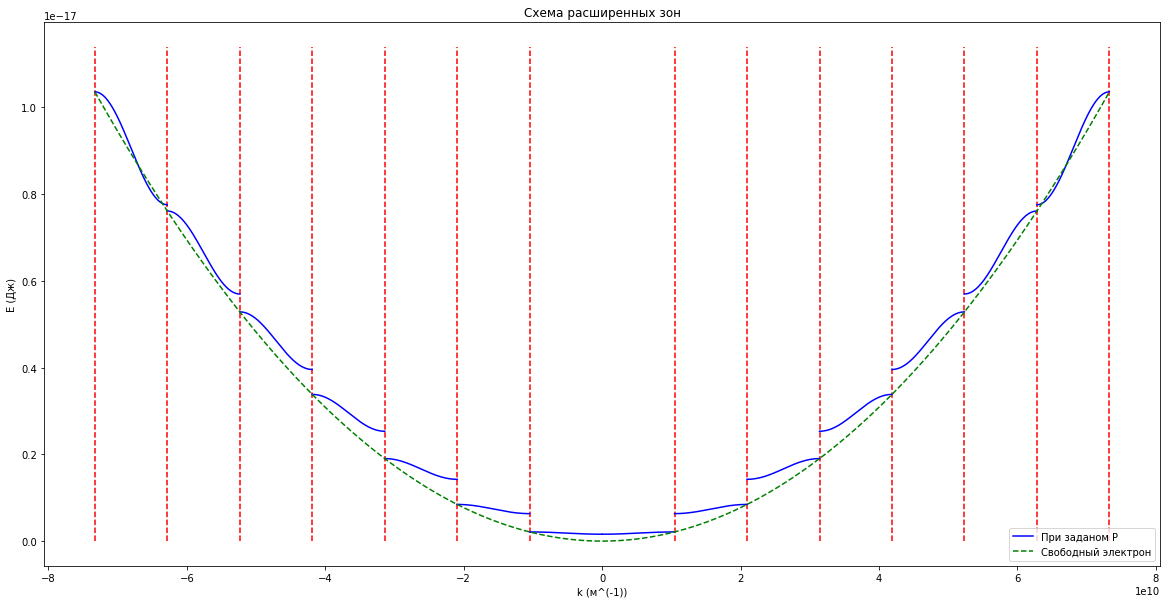

In [ ]:
kx, Ex = iterate_zones_maxi()
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)
ax = fig.add_subplot(111)

ax.plot(kx[0], Ex[0], color="blue", label="При заданом P")
for i in range(1, len(kx)):
  ax.plot(kx[i], Ex[i], color="blue")

maxh = max(Ex[len(Ex) - 1]);

for i in n:
  ax.vlines(-i * pi / a, 0, maxh * 1.1, color="red", ls="--")
  ax.vlines(i * pi / a, 0, maxh * 1.1, color="red", ls="--")

fk, fE = free_electron(kx, Ex)
ax.plot(fk, fE, color="green", ls="--", label="Свободный электрон")  

ax.set_xlabel("k (м^(-1))")
ax.set_ylabel("E (Дж)")
ax.set_title("Схема расширенных зон")
ax.legend(loc="lower right")
plt.show()